In [35]:
import pickle
import librosa
import librosa.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from pydub import AudioSegment
import os

current_dir = os.path.abspath(os.getcwd())
print(current_dir)

with open('LM.pkl', 'rb') as f:
    clf = pickle.load(f)

def contert2vaw(fName):
    if os.path.exists("out.wav"):
        os.remove("out.wav")
    print(os.system('ffmpeg -i '+current_dir+fName+' '+current_dir+'/out.wav'))

    
def generateSpectrogram(fName):
    samples, sample_rate = librosa.load(fName)
    fig = plt.figure(figsize=[4,4])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    fig.savefig('initialSpectrogramm.png')
    image = Image.open("initialSpectrogramm.png")
    box = (40, 40, 248, 248)
    cropped_image = image.crop(box)
    new_image = cropped_image.resize((100, 100))
    jpgImage = Image.new("RGB", new_image.size, (255,255,255))
    jpgImage.paste(new_image,new_image)
    jpgImage.save("processedSpectrogramm.jpg")

C:\Users\muham\GitHub\myBaby\AI-Model


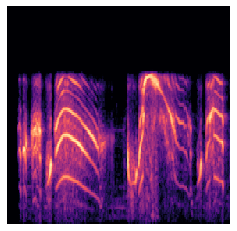

In [36]:
generateSpectrogram('out.wav')

(<matplotlib.image.AxesImage at 0x19edf1735b0>, (100, 100, 3))

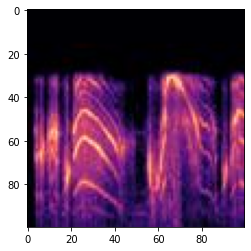

In [38]:
import matplotlib.image as img
image = img.imread("processedSpectrogramm.jpg")
plt.imshow(image), image.shape

In [ ]:

# contert2vaw('/6gF2yvVNC8bh.3gp')
generateSpectrogram('out.wav')
X = []
img = Image.open("processedSpectrogramm.jpg")
img = np.mean(img, axis=2)
[width1,height1]=[img.shape[0],img.shape[1]]
arr=img.reshape(width1*height1)
X.append(arr)

from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(X)
normalized_X = norm.transform(X)
print("Before:")
print(X[0])
print("After:")
print(normalized_X[0])